In [116]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import statsmodels
import warnings
warnings.filterwarnings('ignore')

### Multiple Linear Regression
Regresi dg lebih dari 1 variabel Independent

In [117]:
from sklearn.datasets import load_boston

In [118]:
boston=load_boston()
# bentukya dictionery

In [119]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [120]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [121]:
boston['data'].shape
#datanya ada 506, kolomnya 13

(506, 13)

In [122]:
boston['target']

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [123]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [124]:
df=pd.DataFrame(data=boston['data'], columns=boston['feature_names'])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [125]:
type(boston['target'])
#np array

numpy.ndarray

In [126]:
target=pd.Series(boston['target'])
#dijadiin series

In [127]:
df['Price'] = target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [128]:
## Quick EDA akan dipakai untuk menyiapkan data untuk ML, feature selection atau pemilihan feature

In [129]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
Price      float64
dtype: object

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [131]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [132]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [133]:
bsDesc=[]
for i in df.columns:
    bsDesc.append([ #append untuk masukin masing2 dtypes, dll ke bsDesc diatas
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((df[i].isna().sum() / len(df)) * 100,2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

In [134]:
pd.DataFrame(data=bsDesc,
            columns=[
               'Feature',
               'DataTypes',
               'Null',
               'NullPercentage',
               'Unique',
               'UniqueSample'
            ])

,Feature,DataTypes,Null,NullPercentage,Unique,UniqueSample
0,CRIM,float64,0,0.0,504,"[0.17446, 0.84054]"
1,ZN,float64,0,0.0,26,"[22.0, 12.5]"
2,INDUS,float64,0,0.0,76,"[0.46, 9.9]"
3,CHAS,float64,0,0.0,2,"[1.0, 0.0]"
4,NOX,float64,0,0.0,81,"[0.431, 0.58]"
5,RM,float64,0,0.0,446,"[5.834, 6.456]"
6,AGE,float64,0,0.0,356,"[69.6, 28.4]"
7,DIS,float64,0,0.0,412,"[5.615, 2.5182]"
8,RAD,float64,0,0.0,9,"[4.0, 7.0]"
9,TAX,float64,0,0.0,66,"[264.0, 198.0]"


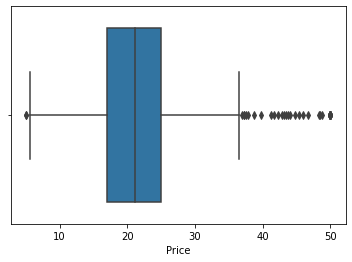

In [135]:
sns.boxplot(df['Price'])
plt.show()
#mencari tahu outlier

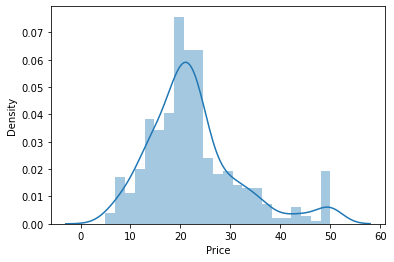

In [136]:
sns.distplot(df['Price'])
plt.show()
#cari tahu outliers

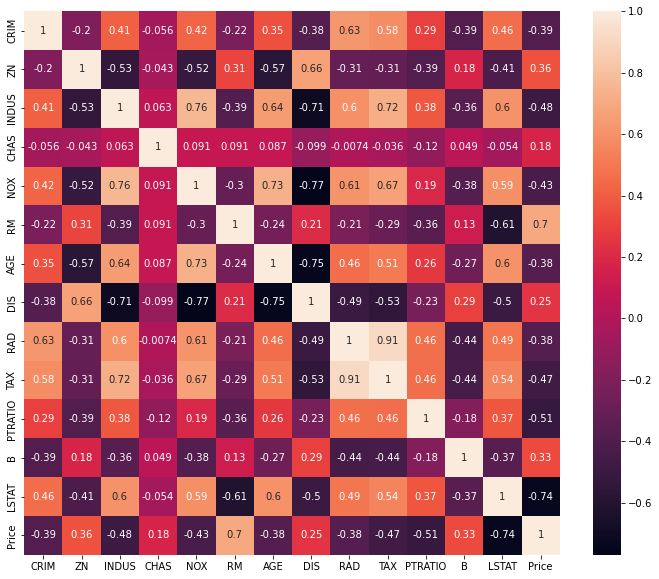

In [137]:
### Pearson
plt.figure(figsize=(12,10))
sns.heatmap(df.corr('pearson'), annot=True)
plt.show()

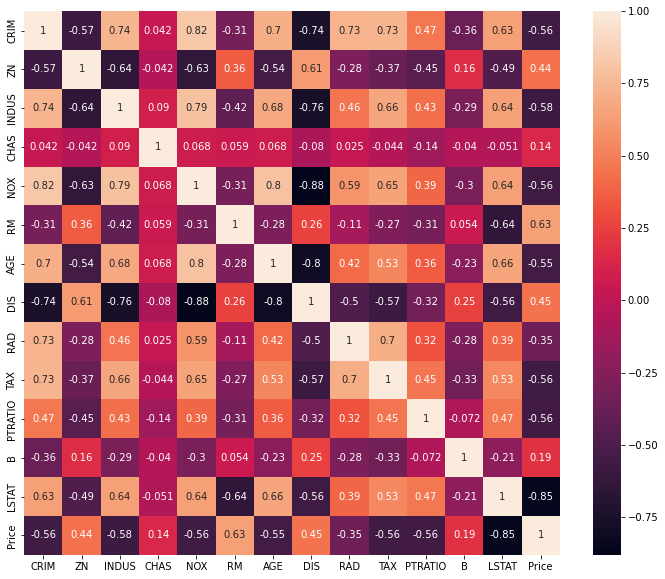

In [138]:
### spearman
plt.figure(figsize=(12,10))
sns.heatmap(df.corr('spearman'), annot=True)
plt.show()

In [139]:
### feature engineering & feature selection

# Feature Selection
- memilih feature yg akan digunakan untuk training model belajar
  salah satu cara yg digunakan adalah menggunakan korelasi
- Drop kolom yg memiliki korelasi di bawah 0.5 atau -0.5
- Range korelasi antara -0.5/0.5 yg digunakan sesuaikan dg kondisi

In [140]:
# Drop kolom yg memiliki korelasi di bawah 0.5 atau -0.5
df.drop(columns=['ZN','CHAS','DIS','RAD','B'])

,CRIM,INDUS,NOX,RM,AGE,TAX,PTRATIO,LSTAT,Price
0,0.00632,2.31,0.538,6.575,65.2,296.0,15.3,4.98,24.0
1,0.02731,7.07,0.469,6.421,78.9,242.0,17.8,9.14,21.6
2,0.02729,7.07,0.469,7.185,61.1,242.0,17.8,4.03,34.7
3,0.03237,2.18,0.458,6.998,45.8,222.0,18.7,2.94,33.4
4,0.06905,2.18,0.458,7.147,54.2,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...
501,0.06263,11.93,0.573,6.593,69.1,273.0,21.0,9.67,22.4
502,0.04527,11.93,0.573,6.120,76.7,273.0,21.0,9.08,20.6
503,0.06076,11.93,0.573,6.976,91.0,273.0,21.0,5.64,23.9
504,0.10959,11.93,0.573,6.794,89.3,273.0,21.0,6.48,22.0


In [141]:
df.drop(columns=['ZN','CHAS','DIS','RAD','B'], inplace=True)
df.head()

,CRIM,INDUS,NOX,RM,AGE,TAX,PTRATIO,LSTAT,Price
0,0.00632,2.31,0.538,6.575,65.2,296.0,15.3,4.98,24.0
1,0.02731,7.07,0.469,6.421,78.9,242.0,17.8,9.14,21.6
2,0.02729,7.07,0.469,7.185,61.1,242.0,17.8,4.03,34.7
3,0.03237,2.18,0.458,6.998,45.8,222.0,18.7,2.94,33.4
4,0.06905,2.18,0.458,7.147,54.2,222.0,18.7,5.33,36.2


In [142]:
X = df.drop(columns='Price')
y = df['Price']

# Spliting data (Training & Testing)

## Machine Learning
- Bertujuan bisa memprediksi atau menjawab soal/data baru(yg tidak ada di dataset)
- Data baru adalah data yg belum dipelajari oleh model
- Data baru adalah data yg sama sekali belum 'dilihat', belum diketahui polanya oleh model

model belajar -> model mempelajari pattern yg ada pada training model
Proses Training Model -> .fit(x,y) -> .fit(soal,jawaban)
Soal -> kolom feature(X)
Jawaban -> kolom target(y)

## Evaluation Matrix
- Penilaian sebaik apa model kita
- Membandingkan jawaban model dibandingkan dg 'kunci jawaban'
- 'Kunci jawaban' adalah data aktual yg kita punya (data target)
- 'Jawaban MOdel' adalah prediksi dari model

## Splitting Data
Dataset yg ada dipotong jadi 2
1. Data untuk training/belajar
2. Data untuk testing -> data untuk simulasi data baru
Data untuk training -> data yg akan dipelajari patternya oleh model, model sudah tahu feature dan targetnya
Data untuk testing -> data yg sama sekali blm diliat dan dipelajari oleh model dan akan diprediksi sebagai
simulasi data baru

Dataset(100%)
akan dipisah menjadi :
Data training (80%) -> data akan dipelajari oleh model, digunakan untuk belajar, latihan try out
Mempelajari Pattern antara feature & target
Data testing(20%) -> data yg digunakan untuk ujian sesungguhnya, evaluation matrix yg utama/penilaian yg sesungguhnya

Distribusi Train and test, cari yg ideal atau proportional. Umumnya 70%-85% untuk train, 15%-30% untk test.
Jumlah train Train + Test = 100%
Goals secara umum untuk ML(Supervised ML) bertujuan mendapatkan sebagus mungkin nilai evaluation matrix untuk
data testing yg sesungguhnya

Data training (data yg dipelajari model) adalah data yg digunakan untuk model mencari pattern/try out 
-> evaluation matrix -> dinilai
Data testing (ujian sesungguhnya/data yg sama sekali blm dilihat oleh model) -> evaluation matrix -> evaluation matrix -> dinilai -> dipelajari/dilihat/diketahui ---> .fit(data)

> Underfitting -> dua-duanya jelek -> nilai evaluation matrix untuk data training maupun testing jelek berdasarkan evaluation matrix
> Overfitting -> nilai evaluation matrix untuk training bagus, untuk testing jelek. Ada perbedaan yg segnifikan antara nilai eva matrix training dan nilai eva matrix testing.
Ada selisih sekitar lebih dari 5 poin
Misal eva matrix train -> 80, eva matrix test -> 72
> Fit -> nilai evaluation matrix untuk training dan testing bagus atau tidak ada perbedaan signifikan anatara nilai eva matrix train ->85, eva matrix testing -> 83

Misal ada kasus
Model A :
Eva matrix train -> 93
Eva matrix testing -> 82

Model B :
Eva matrix train -> 84
Eva matrix testing -> 81

Kita akan memilih model B, karena lebih fit dan stabil,
model A overfitting

## Splitting Dataset

In [144]:
X = df.drop(columns='Price') #features/soal
y = df['Price'] # target/jawaban

In [145]:
from sklearn.model_selection import train_test_split

In [146]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.15,random_state=4)
#random state untuk mengunci randomness yg dilakukan hanya sekali

In [147]:
X_train.head()
#data soal ujian sesungguhnya

,CRIM,INDUS,NOX,RM,AGE,TAX,PTRATIO,LSTAT
139,0.54452,21.89,0.624,6.151,97.9,437.0,21.2,18.46
314,0.36920,9.90,0.544,6.567,87.3,304.0,18.4,9.28
427,37.66190,18.10,0.679,6.202,78.7,666.0,20.2,14.52
102,0.22876,8.56,0.520,6.405,85.4,384.0,20.9,10.63
45,0.17142,6.91,0.448,5.682,33.8,233.0,17.9,10.21


In [148]:
y_train.head()
#kunci jawaban soal try out

139    17.8
314    23.8
427    10.9
102    18.6
45     19.3
Name: Price, dtype: float64

In [149]:
y_test.head()

8      16.5
289    24.8
68     17.4
211    19.3
226    37.6
Name: Price, dtype: float64

In [150]:
X_train.shape

(430, 8)

## ML Modelling

In [151]:
from sklearn.linear_model import LinearRegression

y = ax + b

In [152]:
Model = LinearRegression(fit_intercept=True)
# ketika fi_intercept=false, makanilai konstanta = 0, sehingga ketika nilai seluruh feature=0 nilai target/y=0
# penggunaan fit_intercept true atau false, tergantung dari independent variabel dan kasus bisnisnya

In [153]:
Model.fit(X_train,y_train)
# Model belajar _> mencari pattern dari soal - jawaban (dari feature dan target) data training

LinearRegression()

In [154]:
### Quick Evaluation Matrix

In [155]:
Model.score(X_train,y_train)
# melakukan penilaian/evaluation matrix train set

0.6776018019730137

In [156]:
Model.score(X_test,y_test)
# melakukan penilaian/evaluation matrix test set

0.7310942798089236

In [157]:
Model.predict(X_train)
# melakukan try out

array([17.01153207, 26.50841936, 17.09359115, 22.61567583, 21.61007166,
       18.76213483, 27.75396253, 21.24619275, 26.92133113, 22.12607425,
       33.57183163, 18.89477269, 18.66634005, 38.15841417, 28.55584681,
       37.62861631, 18.96555643, 38.47171108, 20.17829264, 23.26309445,
       20.78193708, 21.05202929, 10.22364853, 20.22738595, 11.75647026,
       22.39249958, 34.40047554, 14.19215691, 26.5729025 , 21.01799215,
       35.35357397, 32.87625822, 33.17714203, 26.50315928, 27.28879072,
       20.06963764,  8.02381289, 31.66600994, 31.42444017, 20.6314385 ,
       41.24507787, 17.61734987,  7.60324901, 20.44040816, 23.90816464,
       14.40908762, 28.00235247, 27.26346882, 20.14896144, 18.1940354 ,
       39.18693623, 14.17307279, 15.35290264, 16.53956163, 39.24151399,
       17.43901168, 42.32110807, 28.72416155, 34.29640657, 19.84536703,
       14.53134883, 25.1112467 , 22.94258421, 17.47930129, 13.76389964,
       15.91355782, 24.5203278 , 24.10836415, -2.91883805, 21.12

In [158]:
Model.predict(X_test)
# menjawab ujian seusngguhnya

array([14.64879972, 26.91478487, 18.92973766, 13.61265461, 37.29609806,
       24.88641332, 31.00049447, 18.71249421, 19.4807022 , 23.36631252,
       29.50992401, 26.62193005, 16.16327417, 30.98938751, 21.73941224,
       18.84868199, 25.02800332,  8.43278753, 11.30454784, 15.67066419,
       11.26971567, 21.24863108, 18.91665201, 22.36996046, 22.32783439,
       19.97281603, 14.21608527, 14.77815487, 21.7477489 , 15.92338864,
       14.85572928, 27.12927619, 33.28527071, 19.84296873, 15.76820342,
       18.1348934 , 30.66942701, 33.14200967, 26.01654683, 24.10320077,
       36.37540789, 34.59225514, 19.63188961, 30.94446212, 29.04400634,
       23.92743735, 38.31872729, 19.9271329 , 19.55535656, 23.65417239,
       29.15924243, 28.39476277, 16.9013979 , 30.16431338, 15.97545982,
       24.02470226, 24.48668206, 31.19305715, 16.19624136, 30.16504936,
       17.46737827, 19.19098074, 30.90540204, 20.05164412, 37.59130856,
       28.67350846, 27.90545149, 11.75151502, 18.98892162, 21.51

In [159]:
Model.intercept_

22.868922510044005

In [160]:
Model.coef_

array([-5.72359076e-02,  3.76821264e-02, -6.88269483e+00,  4.23962146e+00,
        3.18890016e-02, -3.24319218e-04, -9.94870237e-01, -5.59217383e-01])

In [161]:
X_train.columns

Index(['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'TAX', 'PTRATIO', 'LSTAT'], dtype='object')

In [162]:
pd.DataFrame(data = Model.coef_, index=X_train.columns,columns=['coef'])

,coef
CRIM,-0.057236
INDUS,0.037682
NOX,-6.882695
RM,4.239621
AGE,0.031889
TAX,-0.000324
PTRATIO,-0.994870
LSTAT,-0.559217


In [163]:
X_train.head()

,CRIM,INDUS,NOX,RM,AGE,TAX,PTRATIO,LSTAT
139,0.54452,21.89,0.624,6.151,97.9,437.0,21.2,18.46
314,0.36920,9.90,0.544,6.567,87.3,304.0,18.4,9.28
427,37.66190,18.10,0.679,6.202,78.7,666.0,20.2,14.52
102,0.22876,8.56,0.520,6.405,85.4,384.0,20.9,10.63
45,0.17142,6.91,0.448,5.682,33.8,233.0,17.9,10.21


In [164]:
Model.predict([[0.02,21.56,0.75,7.56,21,250,18.20,11.75]])
# memprediksi data baru
# data yg tidak ada di dataset

array([26.48086826])

In [165]:
Model.intercept_
# harga default -> harga ketika semua nilai variabelnya 0

22.868922510044005

In [166]:
Model.predict([[0,0,0,0,0,0,0,0]])

array([22.86892251])

In [167]:
pred_train = Model.predict(X_train)

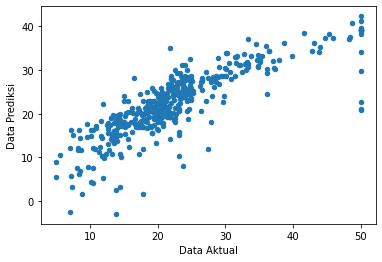

In [168]:
plt.scatter(y_train, pred_train, s=20)
plt.xlabel("Data Aktual")
plt.ylabel("Data Prediksi")
plt.show()
# s=20 menunjukan size 

In [169]:
pred_test = Model.predict(X_test)

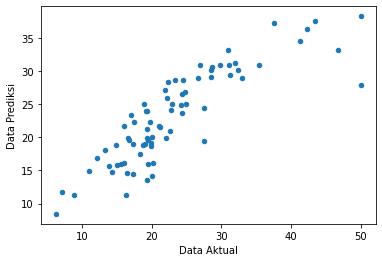

In [170]:
plt.scatter(y_test, pred_test, s=20)
plt.xlabel("Data Aktual")
plt.ylabel("Data Prediksi")
plt.show()

In [171]:
pd.concat([X_train, y_train],axis=1)

,CRIM,INDUS,NOX,RM,AGE,TAX,PTRATIO,LSTAT,Price
139,0.54452,21.89,0.624,6.151,97.9,437.0,21.2,18.46,17.8
314,0.36920,9.90,0.544,6.567,87.3,304.0,18.4,9.28,23.8
427,37.66190,18.10,0.679,6.202,78.7,666.0,20.2,14.52,10.9
102,0.22876,8.56,0.520,6.405,85.4,384.0,20.9,10.63,18.6
45,0.17142,6.91,0.448,5.682,33.8,233.0,17.9,10.21,19.3
...,...,...,...,...,...,...,...,...,...
385,16.81180,18.10,0.700,5.277,98.1,666.0,20.2,30.81,7.2
197,0.04666,1.52,0.404,7.107,36.6,329.0,12.6,8.61,30.3
439,9.39063,18.10,0.740,5.627,93.9,666.0,20.2,22.88,12.8
174,0.08447,4.05,0.510,5.859,68.7,296.0,16.6,9.64,22.6


# Analisa error training set

In [173]:
Training_set = pd.concat([X_train, y_train],axis=1)

In [174]:
Testing_set = pd.concat([X_train, y_train],axis=1)

In [175]:
Training_set['price_pred'] = pred_train
Training_set

,CRIM,INDUS,NOX,RM,AGE,TAX,PTRATIO,LSTAT,Price,price_pred
139,0.54452,21.89,0.624,6.151,97.9,437.0,21.2,18.46,17.8,17.011532
314,0.36920,9.90,0.544,6.567,87.3,304.0,18.4,9.28,23.8,26.508419
427,37.66190,18.10,0.679,6.202,78.7,666.0,20.2,14.52,10.9,17.093591
102,0.22876,8.56,0.520,6.405,85.4,384.0,20.9,10.63,18.6,22.615676
45,0.17142,6.91,0.448,5.682,33.8,233.0,17.9,10.21,19.3,21.610072
...,...,...,...,...,...,...,...,...,...,...
385,16.81180,18.10,0.700,5.277,98.1,666.0,20.2,30.81,7.2,5.729775
197,0.04666,1.52,0.404,7.107,36.6,329.0,12.6,8.61,30.3,33.984120
439,9.39063,18.10,0.740,5.627,93.9,666.0,20.2,22.88,12.8,11.663752
174,0.08447,4.05,0.510,5.859,68.7,296.0,16.6,9.64,22.6,24.535543


In [176]:
Training_set['Error'] = abs(Training_set['Price'] -Training_set['price_pred']) 

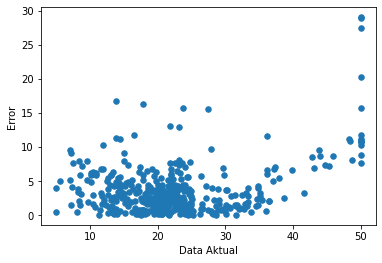

In [177]:
plt.scatter(Training_set['Price'], Training_set['Error'], s=30)
plt.xlabel("Data Aktual")
plt.ylabel("Error")
plt.show()

Distribusi Error
- Model yg bagus memiliki error yg terdistribusi normal
- Memiliki rata-rata error 0

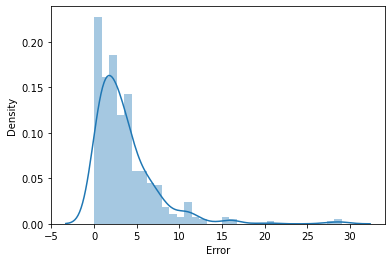

In [178]:
sns.distplot(Training_set['Error'])
plt.show()

In [179]:
Training_set['Error'].mean()

3.646213654939845

In [180]:
Training_set.sort_values('Error', ascending=False).head(10)
# 10 data training dengan error tertinggi
# Analisa data :
# -> error tinggi kebanyakan untuk TAX dg nilai 
# -> kita drop TAX yg nilainya 666dan PTRATIO dg nilai 20.2
# proses diatas disebut projek limitation

,CRIM,INDUS,NOX,RM,AGE,TAX,PTRATIO,LSTAT,Price,price_pred,Error
372,8.26725,18.10,0.668,5.875,89.6,666.0,20.2,8.88,50.0,20.966950,29.033050
368,4.89822,18.10,0.631,4.970,100.0,666.0,20.2,3.26,50.0,21.052029,28.947971
371,9.23230,18.10,0.631,6.216,100.0,666.0,20.2,9.53,50.0,22.580240,27.419760
370,6.53876,18.10,0.631,7.016,97.5,666.0,20.2,2.96,50.0,29.720440,20.279560
374,18.49820,18.10,0.668,4.138,100.0,666.0,20.2,37.97,13.8,-2.918838,16.718838
412,18.81100,18.10,0.597,4.628,100.0,666.0,20.2,34.37,17.9,1.642527,16.257473
186,0.05602,2.46,0.488,7.831,53.6,193.0,17.8,4.45,50.0,34.249584,15.750416
214,0.28955,10.59,0.489,5.412,9.8,277.0,18.6,29.55,23.7,8.023813,15.676187
365,4.55587,18.10,0.718,3.561,87.9,666.0,20.2,7.12,27.5,11.954767,15.545233
364,3.47428,18.10,0.718,8.780,82.9,666.0,20.2,5.29,21.9,35.007180,13.107180


In [181]:
df = df[df['TAX'] != 666]
# drop TAX = 666

In [182]:
df = df[df['PTRATIO'] != 20.2]
# drop PTRATIO = 20.2

In [183]:
### Evolution Matrix for regression

In [184]:
error_train = abs(y_train - pred_train)

In [185]:
error_test = abs(y_test - pred_test)

## Eva Matrix Regression
- R Squared
- MAE
- MSE
- RMSE
- Optional jika banyak error yg outliers gunakan MedAE

## R squared
- koefisien Determinan
- Mengukur seberapa bagus model kita
- Persantase informasi dari Y (dependent variabel) yg tergandung dalam x (Indep Var)
- Analogi : Berapa persen buah mangga yg bisa kita makan ketika kita mengupas mangga
- Range : -infinite sampai 1
- Nilai negatif berarti model lebih jelek dibandingkan dg ketika kita memprediksi nilai berdasarkan target
- Nilai positif berarti model lebih bagus dibandingkan ketika kita menebak/memprediksi nilai berdasarkan rata-rata target
- Semakin mendekati 1 semakin bagus

# MAE (mean absolute error)
- Rata-rata error yg sudah diabsolutkan 
- Range : 0 sampai dg infinite
- Satuannya sama dengan satuan data target
- Mendekati 0 semakin bagus
- Untuk mengetahui error sudah cukup baik atau terlalu besar bandingkan dengan rata-rata target

# MSE (mean squared error)
- Rata-rata eror yg sudah dikuadratkan
- Range 0 - tak hingga
- Memberikan bobot terhadap error
- Semakin tinggi error semakin tinggi bobotnya
- Memberikan penalti terhadap error yg besar
- Semakin mendekati 0 semakin bagus

## RMSE (Root Mean Squared Error)
- Akar kuadrat dari MSE
- Versi standarisasi dari MSE
- Range : 0 s/d tak hingga
- Jenis Eva matrix paling umum digunakan kasus regresi, termasuk yg sering digunakan dalam kompetisi kaggle
- Memberikan bobot terhadap error
- Memberikan penalti terhadap error yg besar
- Mendekati 0 semakin bagus
### Nilai RMSE dan MAE bisa sama ketika semua errornya sama

### Evaluation Metrics calculation

In [186]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, median_absolute_error

In [187]:
### Evaluation untuk data training

In [188]:
y_train # -> kunci jawabn untuk training/try out

139    17.8
314    23.8
427    10.9
102    18.6
45     19.3
       ... 
385     7.2
197    30.3
439    12.8
174    22.6
122    20.5
Name: Price, Length: 430, dtype: float64

In [189]:
pred_train = Model.predict(X_train)
# model menjkawab Try out dan model memprediksi data training

In [190]:
r2_train = r2_score(y_train, pred_train)
r2_train

0.6776018019730137

In [191]:
MAE_train = mean_absolute_error(y_train, pred_train)
MAE_train

3.646213654939842

In [192]:
MSE_train = mean_squared_error(y_train, pred_train)
MSE_train

27.310115685096157

In [193]:
RMSE_train = np.sqrt(MSE_train)
RMSE_train

5.225908120613695

In [194]:
print("Hasil Evaluation Matrix untuk Data Training")
print(("*" *50),("*" *50))
print("Nilai R Squared : ", r2_train.round(2))
print("Nilai MAE : ", MAE_train.round(2))
print("Nilai MSE : ", MSE_train.round(2))
print("Nilai RMSE : ", RMSE_train.round(2))

Hasil Evaluation Matrix untuk Data Training
************************************************** **************************************************
Nilai R Squared :  0.68
Nilai MAE :  3.65
Nilai MSE :  27.31
Nilai RMSE :  5.23


In [195]:
### Evaluation untuk data testing/ ujian yg sesungguhnya

In [196]:
y_test
#kunci jawaban/ujian sesungguhnya

8      16.5
289    24.8
68     17.4
211    19.3
226    37.6
       ... 
6      22.9
63     25.0
239    23.3
123    17.3
64     33.0
Name: Price, Length: 76, dtype: float64

In [197]:
pred_test = Model.predict(X_test)
# Model menjawab ujian sesungguhnya -> model memprediksi data testing

In [198]:
r2_test = r2_score(y_test, pred_test)
r2_test

0.7310942798089236

In [199]:
MAE_test = mean_absolute_error(y_test, pred_test)
MAE_test

3.2930848809837214

In [200]:
MSE_test = mean_squared_error(y_test, pred_test)
MSE_test

22.125849440430557

In [201]:
RMSE_test = np.sqrt(MSE_test)
RMSE_test

4.703812224189074

In [202]:
print("Hasil Evaluation Matrix untuk Data Test")
print(("*" *50),("*" *50))
print("Nilai R Squared : ", r2_test.round(2))
print("Nilai MAE : ", MAE_test.round(2))
print("Nilai MSE : ", MSE_test.round(2))
print("Nilai RMSE : ", RMSE_test.round(2))

Hasil Evaluation Matrix untuk Data Test
************************************************** **************************************************
Nilai R Squared :  0.73
Nilai MAE :  3.29
Nilai MSE :  22.13
Nilai RMSE :  4.7


In [203]:
data = {
    "Training" : [r2_train, MAE_train, MSE_train,RMSE_train],
    "Testing" : [r2_test, MAE_test, MSE_test,RMSE_test]
}

In [204]:
pd.DataFrame(data, index=["R Squared","MAE","MSE","RMSE"])
# membandingkan training dan testing
# hasilnuya jelek(underfitting)

,Training,Testing
R Squared,0.677602,0.731094
MAE,3.646214,3.293085
MSE,27.310116,22.125849
RMSE,5.225908,4.703812
